In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
data = pd.read_csv('../Dataset/weather_data.csv')
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,1
1,2012-01-02,10.9,10.6,2.8,4.5,1
2,2012-01-03,0.8,11.7,7.2,2.3,1
3,2012-01-04,20.3,12.2,5.6,4.7,1
4,2012-01-05,1.3,8.9,2.8,6.1,1


In [56]:
df = data[['date', 'temp_max']].tail(375)

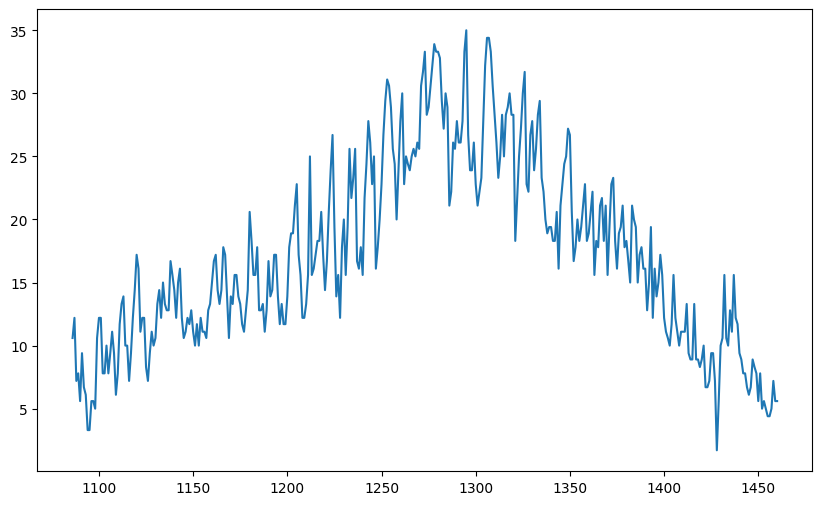

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(df['temp_max'].tail(375))
plt.show()

In [58]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.index.freq = 'D'

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 375 entries, 2014-12-22 to 2015-12-31
Freq: D
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   temp_max  375 non-null    float64
dtypes: float64(1)
memory usage: 5.9 KB


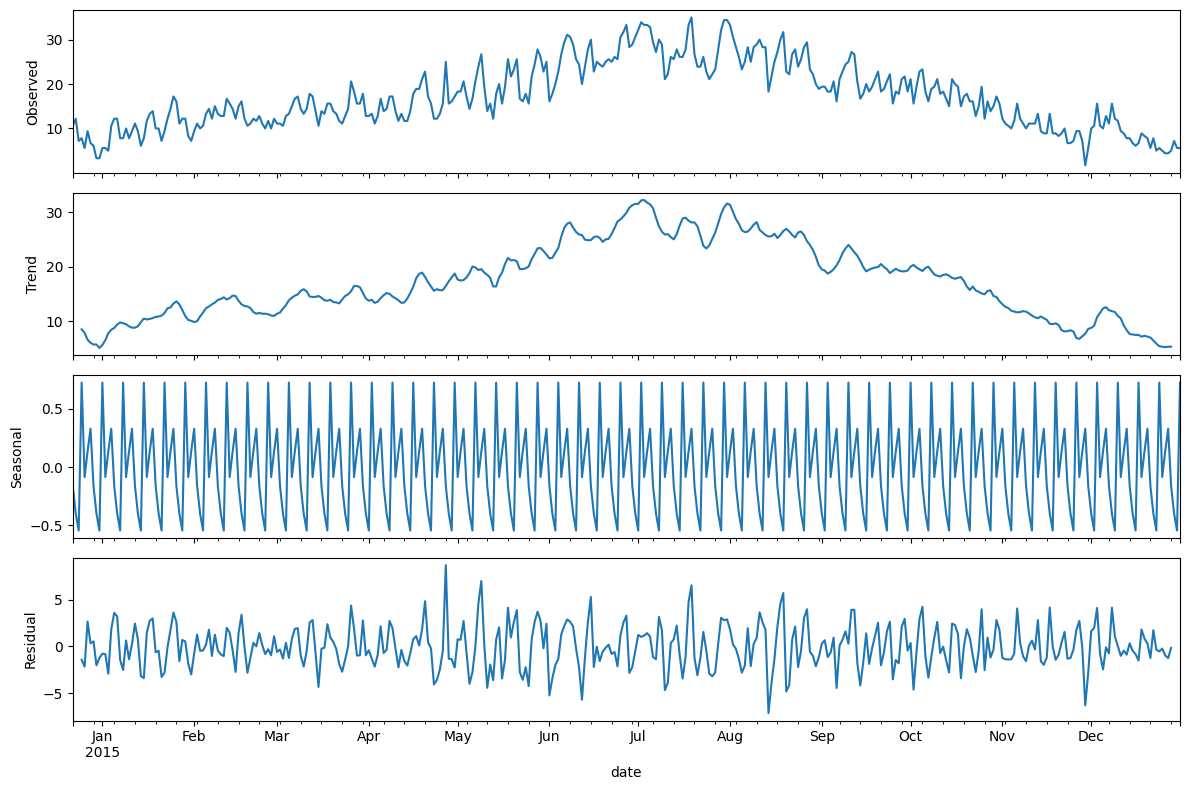

In [60]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


result = sm.tsa.seasonal_decompose(df['temp_max'], model='additive')

# Plot the decomposition results
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(12, 8), sharex=True)
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')

plt.tight_layout()
plt.show()


In [61]:
df['temp_max_trend'] = df['temp_max'].rolling(window=3).mean()
df.head(10)

,temp_max,temp_max_trend
date,,
2014-12-22,10.6,NaN
2014-12-23,12.2,NaN
2014-12-24,7.2,10.000000
2014-12-25,7.8,9.066667
2014-12-26,5.6,6.866667
2014-12-27,9.4,7.600000
2014-12-28,6.7,7.233333
2014-12-29,6.1,7.400000
2014-12-30,3.3,5.366667


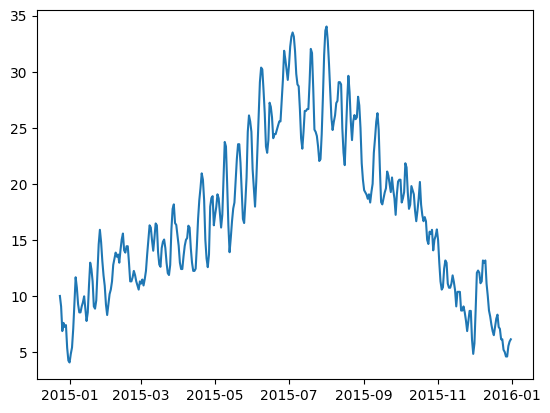

In [62]:
plt.plot(df['temp_max_trend'])
plt.show()

In [63]:
df['temp_max_trend'].isna().sum()

2

In [64]:
nan_indices = df.index[df.isna().any(axis=1)]
print(nan_indices)

DatetimeIndex(['2014-12-22', '2014-12-23'], dtype='datetime64[ns]', name='date', freq='D')


In [65]:
mean = df['temp_max_trend'].mean()
df['temp_max_trend'].fillna(mean, inplace=True)


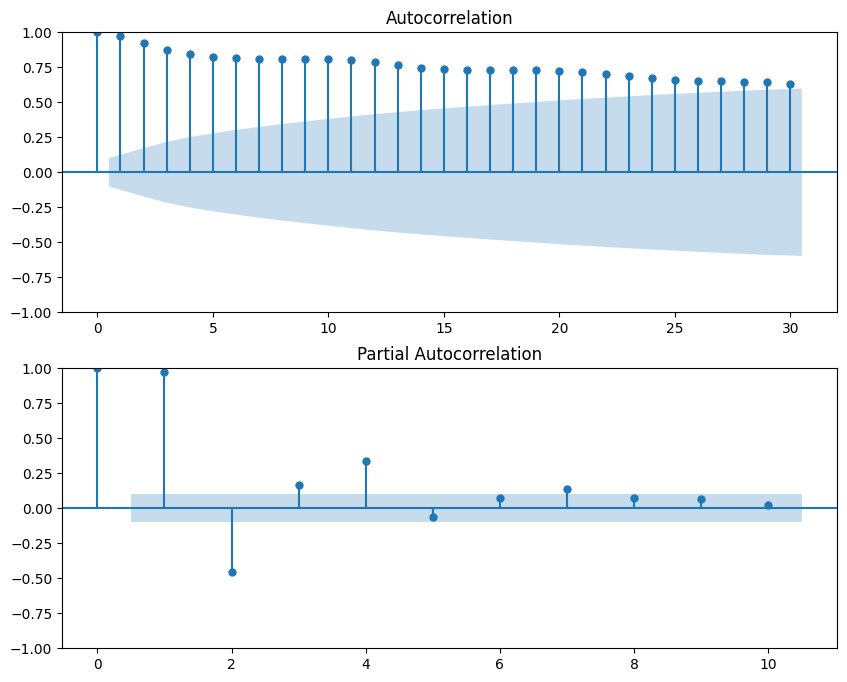

In [66]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(df['temp_max_trend'].dropna(),lags=30, ax=ax[0])
plot_pacf(df['temp_max_trend'].dropna(),lags=10, ax=ax[1])
plt.show()


In [119]:
sarima = sm.tsa.SARIMAX(df['temp_max_trend'], order=(1, 3, 7), seasonal_order=(1, 1, 1, 30))

In [120]:
sarima_result = sarima.fit()

d:\files\Data Science\ds\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\files\Data Science\ds\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [121]:
prediction_result = sarima_result.get_forecast(7)
forecast = prediction_result.predicted_mean

In [122]:
print(forecast)

2016-01-01    6.083692
2016-01-02    6.771184
2016-01-03    7.056242
2016-01-04    6.970670
2016-01-05    6.747681
2016-01-06    6.205243
2016-01-07    6.088251
Freq: D, Name: predicted_mean, dtype: float64


In [123]:
import matplotlib.dates as mdates

def plot_fit_and_forecast(result, column, Ntest=7):
    fig, ax = plt.subplots(figsize=(18, 4))
    ax.plot(column, label='data')

    train_pred = result.fittedvalues

    forecast = result.get_forecast(steps=Ntest)
    forecast_mean = forecast.predicted_mean
    conf_int = forecast.conf_int()
    
    ax.plot(forecast_mean.index, forecast_mean, label='forecast')
    ax.legend()
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    plt.show()

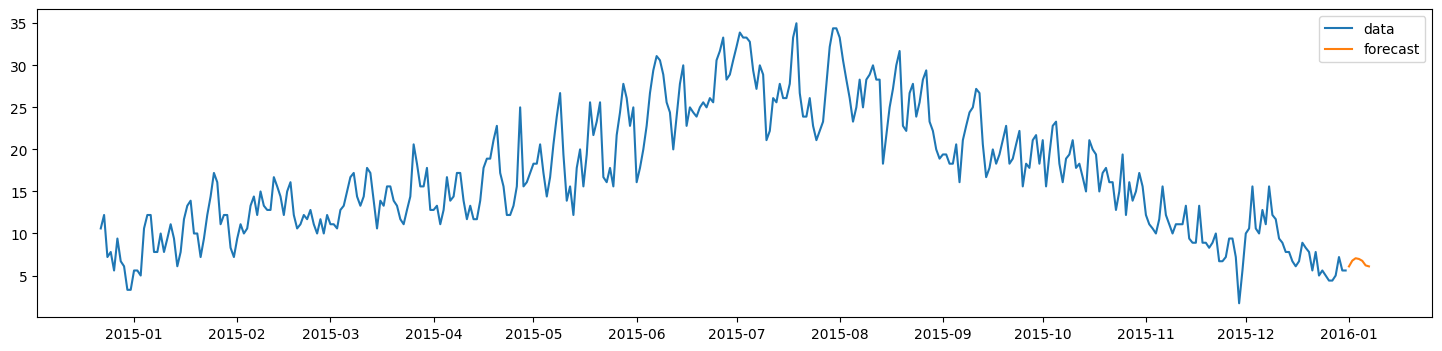

In [125]:
plot_fit_and_forecast(sarima_result,df['temp_max'],7)
plt.show()